**Importing Libraries and Mounting Drive**

In [ ]:
from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive')
import os
import shutil



train_data_dir = '/content/drive/MyDrive/data/'
class_names = ['adult', 'child', 'teenager', 'elderly', 'baby']


Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
import keras

**Creating the Model**

In [ ]:
base_model =  InceptionV3(input_shape=(256,256,3), include_top= False)

87910968/87910968 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=5, activation= 'sigmoid')(X)

model = Model(base_model.input , X)
model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

**Data Augmentation and Preprocessing**





In [ ]:
train_datagen = ImageDataGenerator(featurewise_center= True ,
                                   rotation_range= 0.4,
                                   width_shift_range= 0.3,
                                   horizontal_flip= True,
                                   preprocessing_function= preprocess_input ,
                                   zoom_range= 0.4 ,
                                   shear_range= 0.4)
train_data = train_datagen.flow_from_directory(directory= '/content/drive/MyDrive/data/',
                                               target_size=(256,256),
                                               batch_size= 36)

Found 403 images belonging to 5 classes.


In [ ]:
train_data.class_indices

{'adult': 0, 'baby': 1, 'child': 2, 'elderly': 3, 'teenager': 4}

In [ ]:
t_img, label = train_data.next()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [ ]:
t_img.shape

(36, 256, 256, 3)

**Visualising the data**

In [ ]:
def plotImages(img_arr , label):
  for idx , img in enumerate( img_arr ):
    if idx <= 10 :
      plt.figure(figsize= (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

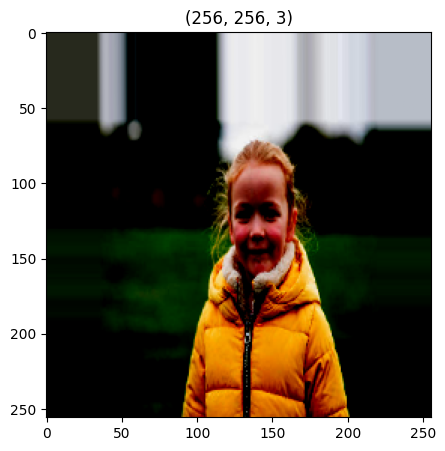

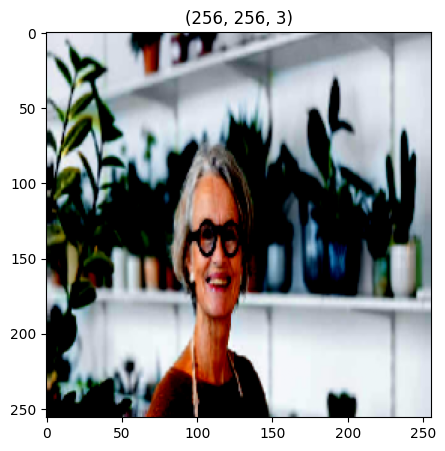

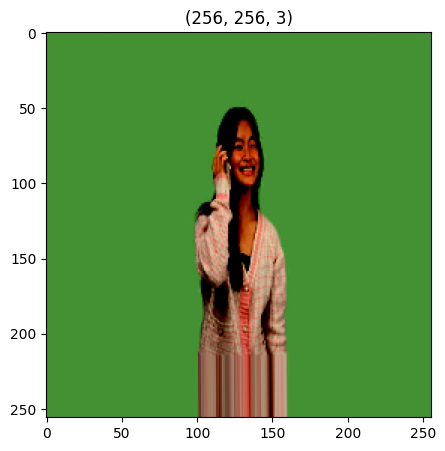

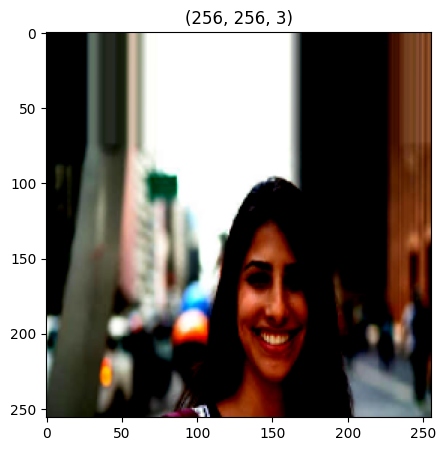

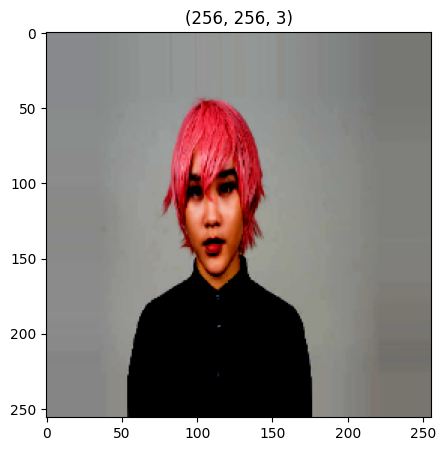

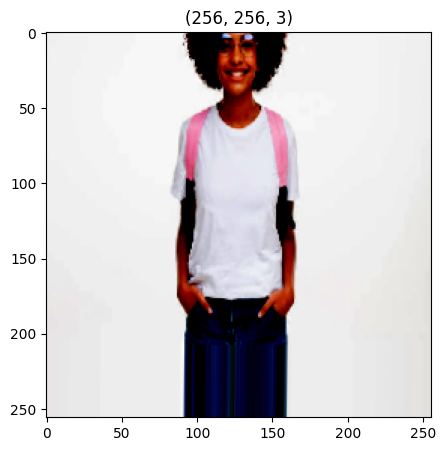

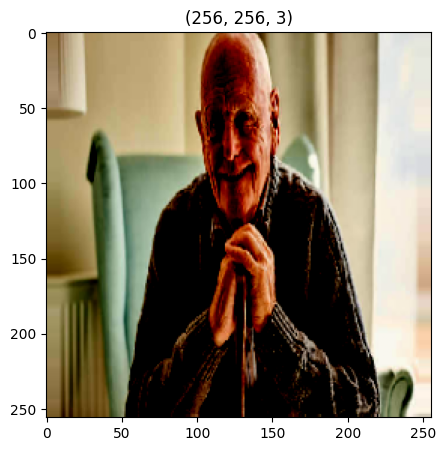

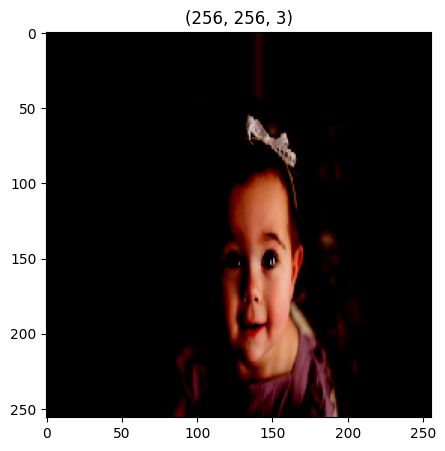

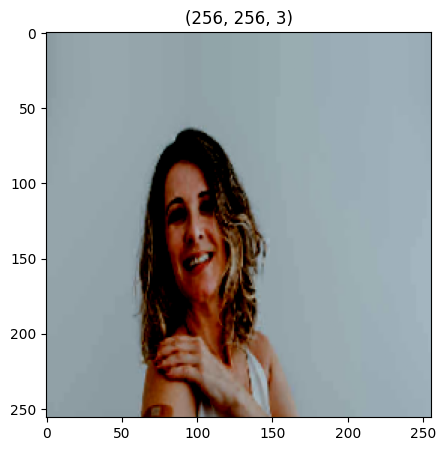

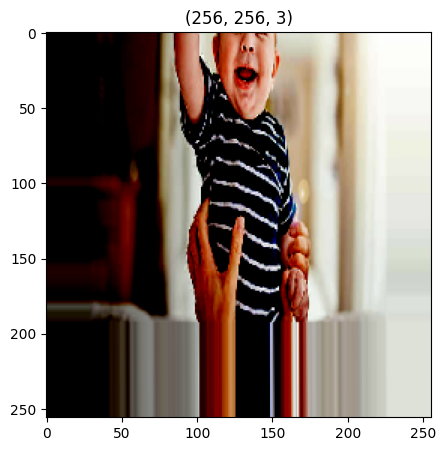

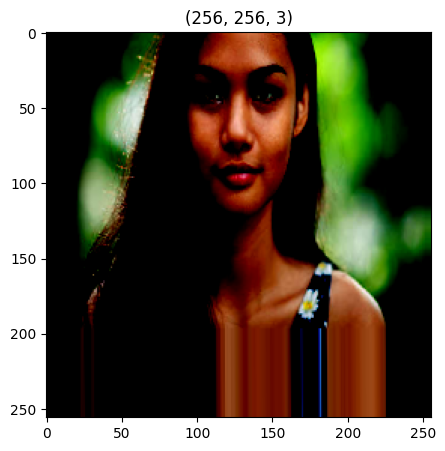

In [ ]:
plotImages(t_img , label)

**Best Model**

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc = ModelCheckpoint(filepath= "./best_model.h5" ,
                     monitor='accuracy',
                     verbose= 1,
                     save_best_only= True )

es = EarlyStopping(monitor= "accuracy" ,
                   min_delta= 0.01,
                   patience= 5,
                   verbose= 1)

cb = [mc,es]

**Training the Model**

In [ ]:
his = model.fit_generator(train_data , steps_per_epoch= 10 , epochs= 30, callbacks= cb)

<ipython-input-25-5fee2136fed7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data , steps_per_epoch= 10 , epochs= 30, callbacks= cb)


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.8216 - accuracy: 0.3656 
Epoch 1: accuracy improved from -inf to 0.36556, saving model to ./best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 160s 16s/step - loss: 2.8216 - accuracy: 0.3656
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 1.4480 - accuracy: 0.5770
Epoch 2: accuracy improved from 0.36556 to 0.57704, saving model to ./best_model.h5
10/10 [==============================] - 18s 2s/step - loss: 1.4480 - accuracy: 0.5770
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 1.0206 - accuracy: 0.6133
Epoch 3: accuracy improved from 0.57704 to 0.61329, saving model to ./best_model.h5
10/10 [==============================] - 10s 963ms/step - loss: 1.0206 - accuracy: 0.6133
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.9376 - accuracy: 0.6163
Epoch 4: accuracy improved from 0.61329 to 0.61631, saving model to ./best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.9376 - accuracy: 0.6163
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.6487 - accuracy: 0.6949
Epoch 5: accuracy i

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

**Evaluating Training History**

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

<ipython-input-28-432d6ffdd0af>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(h['accuracy'] , 'go--' , c = "red" , )


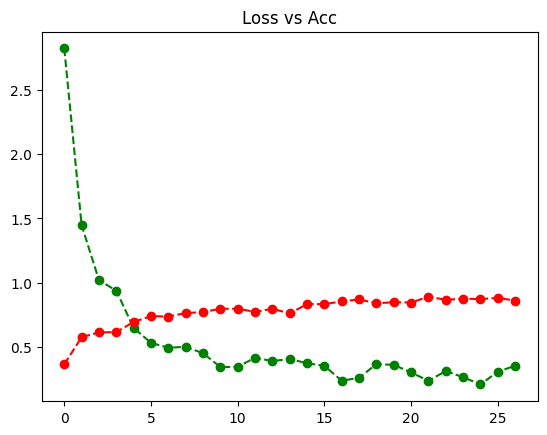

In [ ]:
plt.plot(h['loss'], 'go--')
plt.plot(h['accuracy'] , 'go--' , c = "red" , )

plt.title("Loss vs Acc")
plt.show()

**Making Predictions**

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless
!pip install opencv-python
!pip install opencv-python-headless --no-deps

import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face and age detection models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image from the camera
cap = cv2.VideoCapture(0)

while True:
    # Read frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Get the detected face region
        face_roi = frame[y:y + h, x:x + w]
        # Perform age estimation here using your model

        # Display age estimation on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        age_text = "Age: 25"  # Replace with the estimated age
        cv2.putText(frame, age_text, (x, y - 10), font, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the resulting frame
    cv2_imshow(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


error: ignored

1/1 [==============================] - 0s 45ms/step


The image is a child


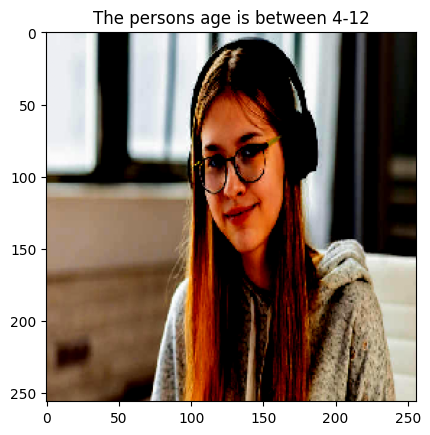

In [ ]:
path = "/content/drive/MyDrive/data/child/child15.jpg"
img = load_img (path, target_size=(256,256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The image is an adult")
elif pred == 1:
  print("The image is a baby")
elif pred == 2:
  print("The image is a child")
elif pred == 3:
  print("The image is a elderly")
else:
  print("The image is a teenager")

if pred == 0:
  age = "The persons age is between 20-4"
elif pred == 1:
  age = "The persons age is between 0-3"
elif pred == 2:
  age = "The persons age is between 4-12"
elif pred == 3:
  age = "The persons age is between 50-90"
else:
  age = "The persons age is between 13-19"

plt.imshow(input_arr[0])
plt.title(age)
plt.show()